In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## RS相關特徵

In [ ]:
a = pd.DataFrame([[1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,12]])
b = pd.DataFrame([[1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10]])
print(a)
print(a.diff(axis=0, periods=-1))

### 成交量動能

In [ ]:
CF_weight = pd.read_excel('100產業分析/概念股成交值排行.xlsx')
industry_columns = CF_weight.columns[1:]
number = CF_weight.loc[0]
CF_weight = CF_weight[::-1]
CF_weight.fillna(0, inplace=True)
CF_weight.set_index('Unnamed: 0', inplace=True)

CF_weight.drop('number', axis=0, inplace=True)
RS = pd.read_excel('100產業分析/概念股RS排行.xlsx')
RS = RS[::-1]
RS.fillna(0, inplace=True)
RS.set_index('Unnamed: 0', inplace=True)
RS.drop('number', axis=0, inplace=True)


display(CF_weight)
display(RS)
display(number)

In [ ]:
RS_MA = pd.DataFrame([], columns=industry_columns, index=RS.index)
for industry in industry_columns:
    RS_MA[f'{industry}_5MA'] = RS[industry].rolling(window=5).mean()
    RS_MA[f'{industry}_10MA'] = RS[industry].rolling(window=10).mean()
    RS_MA[f'{industry}_20MA'] = RS[industry].rolling(window=20).mean()
RS_MA.fillna(0, inplace=True)

In [ ]:
CF_momentum = pd.DataFrame(None)
RS_momentum = RS_MA.diff(axis=0, periods=1)
RS_momentum.fillna(0, inplace=True)


In [ ]:
CF_momentum_5MA = pd.DataFrame([], columns=industry_columns, index=RS_momentum.index)
for industry in industry_columns:
    CF_momentum_5MA[f'{industry}'] = RS_momentum[f'{industry}_5MA'] * CF_weight[f'{industry}']
display(CF_momentum_5MA)

In [ ]:
for industry in industry_columns:
    CF_momentum_5MA[f'{industry}_5MA'] = CF_momentum_5MA[f'{industry}'].rolling(window=5).mean()
    CF_momentum_5MA[f'{industry}_10MA'] = CF_momentum_5MA[f'{industry}'].rolling(window=10).mean()
    CF_momentum_5MA[f'{industry}_20MA'] = CF_momentum_5MA[f'{industry}'].rolling(window=20).mean()
    CF_momentum_5MA[f'{industry}_60MA'] = CF_momentum_5MA[f'{industry}'].rolling(window=60).mean()
CF_momentum_5MA.fillna(0, inplace=True)

In [ ]:
industry = '電線電纜'
n = 500
# 1倍標準差
std1 = CF_momentum_5MA[f'{industry}'].values[-n:-n+200].std()
# 2倍標準差
std2 = CF_momentum_5MA[f'{industry}'].values[-n:-n+200].std() * 2
# 3倍標準差
std3 = CF_momentum_5MA[f'{industry}'].values[-n:-n+200].std() * 3
plt.figure(figsize=(30,10))
plt.plot(CF_momentum_5MA[f'{industry}_5MA'].iloc[-n:])
plt.plot(CF_momentum_5MA[f'{industry}_10MA'].iloc[-n:])
plt.plot(CF_momentum_5MA[f'{industry}_20MA'].iloc[-n:])
plt.plot(CF_momentum_5MA[f'{industry}_60MA'].iloc[-n:])
# horizontal line
plt.axhline(y=std1, color='r', linestyle='--')
plt.axhline(y=-std1, color='r', linestyle='--')
plt.axhline(y=std2, color='g', linestyle='--')
plt.axhline(y=-std2, color='g', linestyle='--')
plt.axhline(y=std3, color='b', linestyle='--')
plt.axhline(y=-std3, color='b', linestyle='--')
plt.axvline(x=CF_momentum_5MA.index.values[-n+200], color='black', linestyle='--')
# plt.xticks(rotation=90)
plt.title(f'{industry}', fontsize=20)
plt.xticks(np.arange(0,n,2), CF_momentum_5MA.index.values[-n:][::2], rotation=90)
plt.legend(['5MA', '10MA', '20MA', '60MA'])
plt.grid()
plt.show()

In [ ]:
n = 500
for industry in industry_columns:
    # 1倍標準差
    std1 = CF_momentum_5MA[f'{industry}'].values[-n:-n+200].std()
    # 2倍標準差
    std2 = CF_momentum_5MA[f'{industry}'].values[-n:-n+200].std() * 2
    # 3倍標準差
    std3 = CF_momentum_5MA[f'{industry}'].values[-n:-n+200].std() * 3
    plt.figure(figsize=(30,10))
    plt.plot(CF_momentum_5MA[f'{industry}_5MA'].iloc[-n:])
    plt.plot(CF_momentum_5MA[f'{industry}_10MA'].iloc[-n:])
    plt.plot(CF_momentum_5MA[f'{industry}_20MA'].iloc[-n:])
    plt.plot(CF_momentum_5MA[f'{industry}_60MA'].iloc[-n:])
    # horizontal line
    plt.axhline(y=std1, color='r', linestyle='--')
    plt.axhline(y=-std1, color='r', linestyle='--')
    plt.axhline(y=std2, color='g', linestyle='--')
    plt.axhline(y=-std2, color='g', linestyle='--')
    plt.axhline(y=std3, color='b', linestyle='--')
    plt.axhline(y=-std3, color='b', linestyle='--')
    plt.axvline(x=CF_momentum_5MA.index.values[-n+200], color='black', linestyle='--')
    # plt.xticks(rotation=90)
    plt.title(f'{industry}', fontsize=20)
    plt.xticks(np.arange(0,n,2), CF_momentum_5MA.index.values[-n:][::2], rotation=90)
    plt.legend(['5MA', '10MA', '20MA', '60MA'])
    plt.grid()
    plt.show()

In [ ]:
for industry in industry_columns:
    CF_momentum[f'{industry}_5MA'] = CF_momentum[industry].rolling(window=5).mean()
    CF_momentum[f'{industry}_10MA'] = CF_momentum[industry].rolling(window=10).mean()
    CF_momentum[f'{industry}_20MA'] = CF_momentum[industry].rolling(window=20).mean()
CF_momentum.fillna(0, inplace=True)

In [ ]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']


In [ ]:

for industry in ['IC設計']:
    plt.figure(figsize=(30, 10))
    plt.plot(CF_momentum[industry].iloc[:200].values[::-1], label=industry)
    plt.plot(CF_momentum[f'{industry}_5MA'].iloc[:200].values[::-1], label=f'{industry}_5MA')
    plt.plot(CF_momentum[f'{industry}_10MA'].iloc[:200].values[::-1], label=f'{industry}_10MA')
    plt.plot(CF_momentum[f'{industry}_20MA'].iloc[:200].values[::-1], label=f'{industry}_20MA')
    plt.legend()
    plt.xticks(np.arange(0, 200, 5), CF_momentum.index[:200:5][::-1], rotation=90)
    plt.show()

### 策略選股數量 v.s.大盤

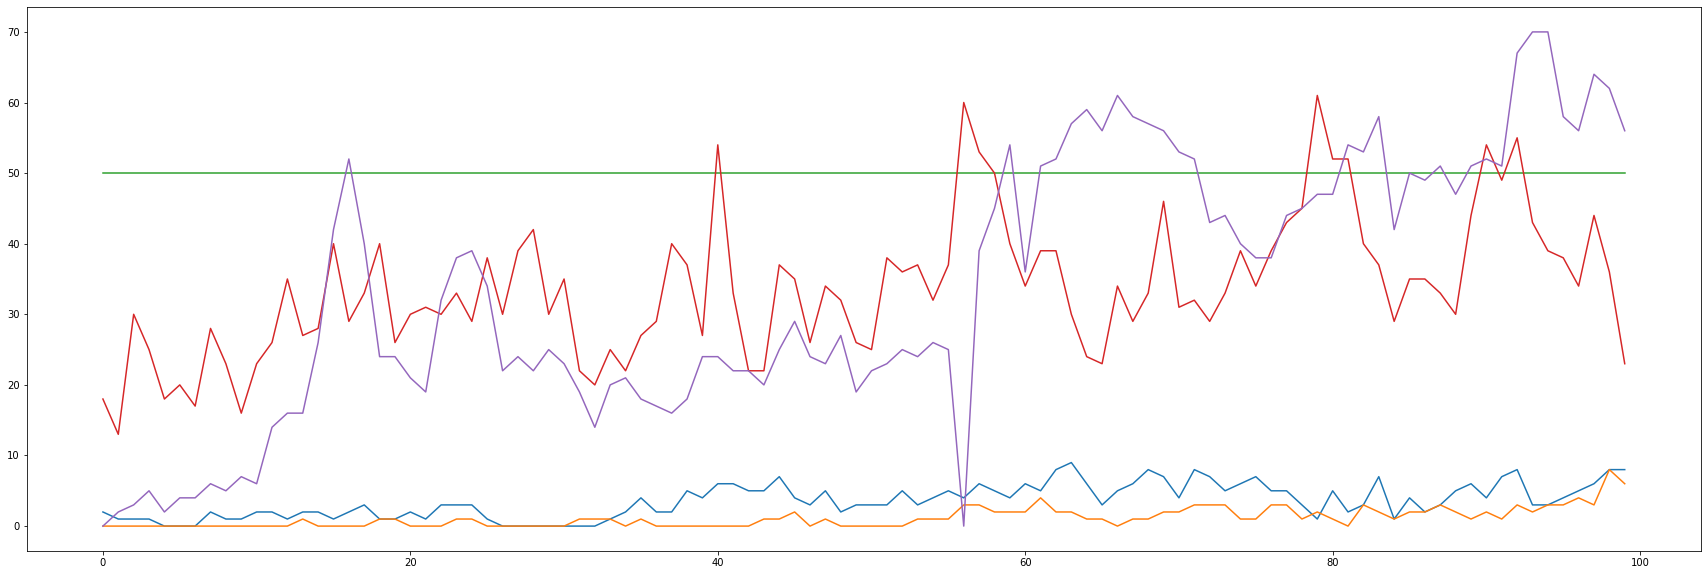

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
def read_dialy_data(file_name):
    file_folder = 'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選'
    df = pd.read_excel(os.path.join(file_folder, file_name))
    return df
def calculate_number_of_stock(df, template):
    return df[template].sum()
def build_dataframe(**kwargs):
    return pd.DataFrame([kwargs])
def plot_template(df):
    for k, v in df.items():
        plt.plot(v, label=k)
file_names = os.listdir('C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選')
template_df = pd.DataFrame([], columns=['T5', 'T5-2', 'T6', 'T11', 'T21'])
for i, file_name in enumerate(file_names[:100]):
    df = read_dialy_data(file_name)
    T5 = calculate_number_of_stock(df, 'T5')
    T5_2 = calculate_number_of_stock(df, 'T5-2')
    T6 = calculate_number_of_stock(df, 'T6')
    T11 = calculate_number_of_stock(df, 'T11')
    T21 = calculate_number_of_stock(df, 'T21')
    template_dict = {'T5': T5, 'T5-2': T5_2, 'T6': T6, 'T11': T11, 'T21': T21}
    template_df.loc[i] = build_dataframe(**template_dict).iloc[0]
plt.figure(figsize=(30, 10))
plot_template(template_df)
plt.legend()
plt.show()


In [1]:
import pandas as pd
import os
import time
import glob

def read_all_data_original(file_folder):
    all_files = sorted([f for f in os.listdir(file_folder) if f.endswith('.xlsx')])
    all_data = []
    for file_name in all_files[:50]:
        file_path = os.path.join(file_folder, file_name)
        df = pd.read_excel(file_path)
        df['日期'] = file_name.split('選')[0]
        all_data.append(df)
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df['日期'] = pd.to_datetime(combined_df['日期'])
    print('read_all_data_original done')
    return combined_df

# 測試原始方法的時間
file_folder = 'C:/Users/User/Desktop/StockInfoHub/Stock_Data_Collector/全個股條件篩選'

def read_all_data_optimized(file_folder):
    all_files = glob.glob(os.path.join(file_folder, '*.xlsx'))
    all_data = [
        pd.read_excel(file).assign(日期=os.path.basename(file).split('選')[0])
        for file in all_files[:50]
    ]
    combined_df = pd.concat(all_data, ignore_index=True)
    combined_df['日期'] = pd.to_datetime(combined_df['日期'])
    print('read_all_data_optimized done')
    return combined_df
start_time = time.time()
all_data_df_optimized = read_all_data_original(file_folder)
end_time = time.time()
print(f"優化方法耗時: {end_time - start_time:.2f} 秒")

read_all_data_original done
優化方法耗時: 18.48 秒
